In [4]:
import sys
sys.path.append("../src")
import numpy as np
from datasets.BavarianCrops_Dataset import BavarianCropsDataset
from datasets.GAFDataset import GAFDataset
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from matplotlib import cm
from matplotlib.lines import Line2D

def save_plot(fig,fname):
    from matplotlib.backends.backend_pdf import PdfPages
    print(f"writing {fname}")
    with PdfPages(fname) as pdf:
        pdf.savefig(fig,bbox_inches='tight')

In [4]:

classmapping = "/data/BavarianCrops/classmapping.isprs.csv"

tum_dataset = BavarianCropsDataset(root="/data/BavarianCrops", 
                     region="holl", 
                     partition="test",
                     classmapping = classmapping, 
                     scheme="random",
                     samplet=50, 
                     mode="traintest")

tum_dataset_krum = BavarianCropsDataset(root="/data/BavarianCrops", 
                     region="krum", 
                     partition="test",
                     scheme="random",
                     classmapping = classmapping, 
                     samplet=50, 
                     mode="traintest")


gaf_dataset = GAFDataset("/data/GAFdataset", region="holl", partition="test", 
                     scheme="random", classmapping="/data/BavarianCrops/classmapping.csv.gaf.v2", features="all")

Initializing BavarianCropsDataset test partition in holl
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/random/holl/test
loaded 6901 samples
Dataset /data/BavarianCrops. region holl. partition test. X:6901x(74, 13), y:(6901,) with 23 classes
Initializing BavarianCropsDataset test partition in krum
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/random/krum/test
loaded 7013 samples
Dataset /data/BavarianCrops. region krum. partition test. X:7013x(71, 13), y:(7013,) with 23 classes
saving npy arrays to /data/GAFdataset/npy/holl
Dataset /data/GAFdataset/test_train_holl.h5. region holl. partition test. X:(7006, 23, 18), y:(7006,) with 33 classes


../src/datasets/GAFDataset.py:117: RuntimeWarning: divide by zero encountered in true_divide
  self.classweights = 1 / self.hist


In [5]:
def get_npy(dataset):

    x = list()
    y = list()
    meta= list()
    for i in range(len(dataset)):
        x_,y_,meta_ = dataset[i]
        x.append(x_.numpy())
        y.append(y_.numpy())
        meta.append(meta_)

    return np.stack(x), np.stack(y), np.stack(meta)

In [6]:
tum = get_npy(tum_dataset)
tum2 = get_npy(tum_dataset)
tum3 = get_npy(tum_dataset)
gaf = get_npy(gaf_dataset)

x_krum, y_krum, meta_krum = get_npy(tum_dataset_krum)


In [7]:
#np.save("/home/marc/projects/phiweek19/data/x_krum.npy",x_krum)
#np.save("/home/marc/projects/phiweek19/data/y_krum.npy",y_krum)
#np.save("/home/marc/projects/phiweek19/data/meta_krum.npy",meta_krum)

In [8]:
tx,ty,tmeta = tum
tx2, *_ = tum2
tx3, *_ = tum3
x,y,meta = gaf

AssertionError: 

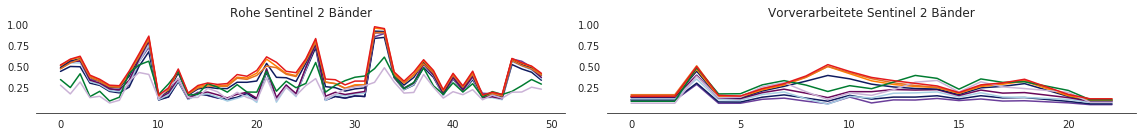

In [9]:
import os


#sns.set_style("whitegrid")

gafbands = ["B02", "B03", "B04", "B05", "B06", "B07", "B08", "B11", "B12", "B8A",
         "BRIGHTNESS", "IRECI", "NDVI", "NDWI", "NDVVVH", "RATIOVVVH", "VH", "VV"]
tumbands = ['B01', 'B10', 'B11', 'B12', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08',
       'B8A', 'B09']

colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00','#cab2d6',
          '#6a3d9a', '#0f1b5f', '#b15928', '#005293', '#98c6ea', '#e37222', '#a2ad00', '#69085a', '#007c30', 
          '#00778a', '#000000', '#0f1b5f']

allbands = list(set(gafbands + tumbands))
colordict = dict(zip(allbands, colors))

colordict = {'B04': '#a6cee3', 'NDWI': '#1f78b4', 'NDVI': '#b2df8a', 'RATIOVVVH': '#33a02c', 'B09': '#fb9a99', 'B8A': '#e31a1c', 'IRECI': '#fdbf6f', 'B07': '#ff7f00', 'B12': '#cab2d6', 'B02': '#6a3d9a', 'B03': '#0f1b5f', 'B01': '#b15928', 'B10': '#005293', 'VH': '#98c6ea', 'B08': '#e37222', 'VV': '#a2ad00', 'B05': '#69085a', 'B11': '#007c30', 'NDVVVH': '#00778a', 'BRIGHTNESS': '#000000', 'B06': '#0f1b5f'}

plotbands = ["B02", "B03", "B04", "B05", "B06", "B07", "B08", "B11", "B12", "B8A"]


def plot_ds(idx, tum, gaf, classname, write=None):
    tx,ty,tmeta = tum
    x,y,meta = gaf
    
    assert meta[idx] == tmeta[idx]
    fig,axs = plt.subplots(1,2, figsize=(16,2))
    
    title = "Parzelle {}: {}".format(meta[idx],classname[y[idx,0]])
    #fig.suptitle(title, x=0.1, y=1.12, horizontalalignment='left', verticalalignment='top', fontsize = 13)
    #plt.subplots_adjust(left=None, bottom=None, right=None, top=.1)
    sns.despine(offset=6, left=True,ax=axs[0])
    sns.despine(offset=6, left=True,ax=axs[1])
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for band in plotbands:
        axs[0].plot(tx[idx,:,tumbands.index(band)], color=colordict[band])
        axs[0].set_title("Rohe Sentinel 2 Bänder")
        axs[1].set_ylim(0,1)
        axs[1].plot(x[idx,:,gafbands.index(band)], color=colordict[band])
        axs[1].set_title("Vorverarbeitete Sentinel 2 Bänder")
        axs[1].set_ylim(*axs[0].get_ylim())
        #axs[2].plot(tx2[idx,:,band], color=colors[band])
        #axs[3].plot(tx3[idx,:,band], color=colors[band])
        
    if write is not None:
        os.makedirs(write, exist_ok=True)
        fig.savefig(os.path.join(write,title)+".png", dpi=300, format="png")

for idx in [3,4,5,6,7,8,9]:
    
    plot_ds(idx, tum, gaf, tum_dataset.classname, write=None)
    

In [10]:
import pandas as pd

tx,ty,tmeta = tum
x,y,meta = gaf

pd.DataFrame(x[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.03760,0.065500,0.068700,0.125100,0.207900,0.232400,0.273200,0.202700,0.126600,0.256300,0.350100,0.269500,0.567900,0.159000,0.665300,0.005240,0.019276,0.001007
1,0.03760,0.065500,0.068700,0.125100,0.207900,0.232400,0.273200,0.202700,0.126600,0.256300,0.350100,0.269500,0.567900,0.159000,0.708678,0.006525,0.016395,0.000949
2,0.03760,0.065500,0.068700,0.125100,0.207900,0.232400,0.273200,0.202700,0.126600,0.256300,0.350100,0.269500,0.567900,0.159000,0.760346,0.008033,0.009043,0.000680
3,0.03760,0.065500,0.068700,0.125100,0.207900,0.232400,0.273200,0.202700,0.126600,0.256300,0.350100,0.269500,0.567900,0.159000,0.799422,0.009435,0.004492,0.000452
4,0.04940,0.067200,0.067900,0.110150,0.174200,0.194050,0.216050,0.163550,0.109800,0.211850,0.286000,0.185600,0.467250,0.122600,0.741071,0.007480,0.014340,0.000891
5,0.06120,0.068900,0.067100,0.095200,0.140500,0.155700,0.158900,0.124400,0.093000,0.167400,0.221900,0.101700,0.366600,0.086200,0.752334,0.007475,0.011884,0.000847
6,0.04170,0.072900,0.073900,0.130800,0.237300,0.267600,0.312000,0.269600,0.169000,0.297600,0.425200,0.359500,0.619200,0.074600,0.718294,0.006454,0.015720,0.000982
7,0.03035,0.067600,0.038700,0.111800,0.374550,0.455000,0.483250,0.181550,0.087850,0.484400,0.523550,1.380950,0.848650,0.456100,0.631114,0.004758,0.013318,0.000593
8,0.04490,0.074100,0.045900,0.117450,0.365500,0.449100,0.469750,0.189350,0.090250,0.479850,0.517000,1.266850,0.816450,0.417050,0.623946,0.004564,0.014570,0.000590
9,0.04200,0.061500,0.043100,0.100800,0.253400,0.308100,0.331900,0.187200,0.091500,0.344300,0.390400,0.629600,0.762300,0.269700,0.556706,0.003677,0.013121,0.000462


writing /home/marc/projects/Phiweek19_Presentation/images/example/12-71456800.csv
writing /home/marc/projects/Phiweek19_Presentation/images/example/10-71456800_raw.csv
writing /home/marc/projects/Phiweek19_Presentation/images/example/13-71459175.csv
writing /home/marc/projects/Phiweek19_Presentation/images/example/11-71459175_raw.csv
writing /home/marc/projects/Phiweek19_Presentation/images/example/12-71459194.csv
writing /home/marc/projects/Phiweek19_Presentation/images/example/10-71459194_raw.csv
writing /home/marc/projects/Phiweek19_Presentation/images/example/20-71459842.csv
writing /home/marc/projects/Phiweek19_Presentation/images/example/15-71459842_raw.csv
writing /home/marc/projects/Phiweek19_Presentation/images/example/27-71460091.csv
writing /home/marc/projects/Phiweek19_Presentation/images/example/10-71460091_raw.csv
writing /home/marc/projects/Phiweek19_Presentation/images/example/27-71460294.csv
writing /home/marc/projects/Phiweek19_Presentation/images/example/10-71460294_

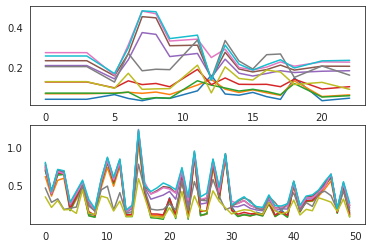

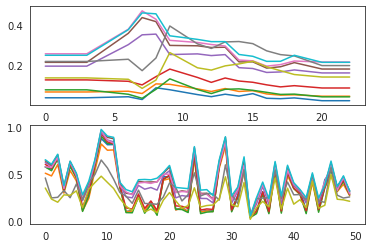

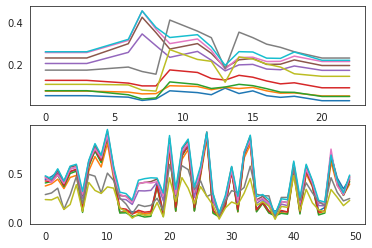

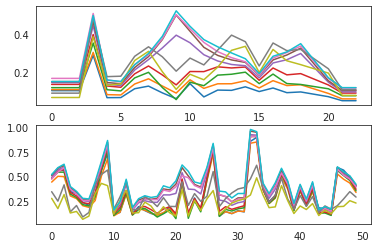

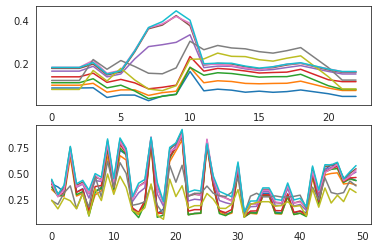

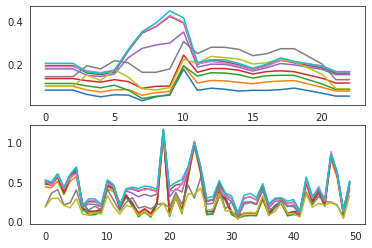

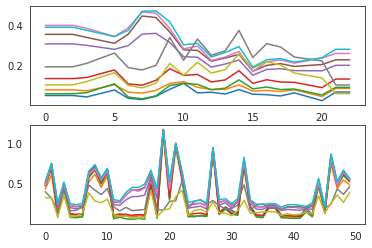

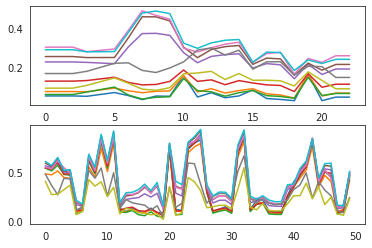

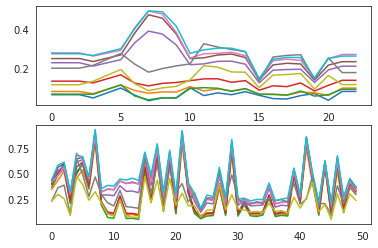

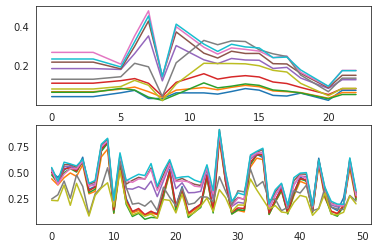

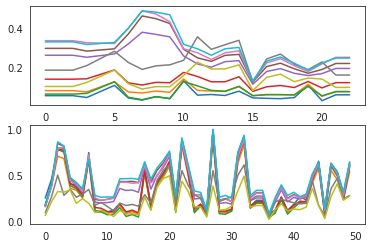

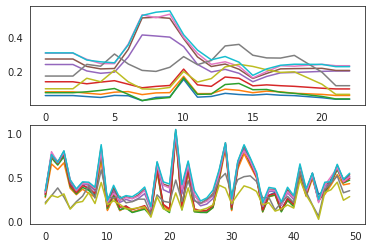

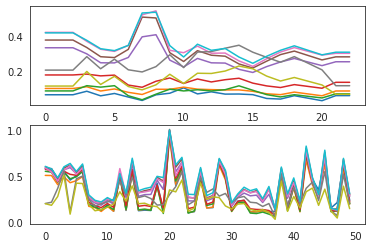

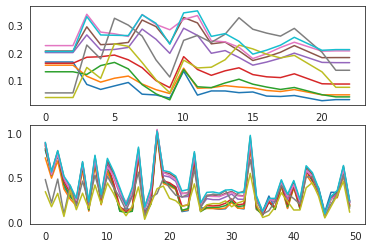

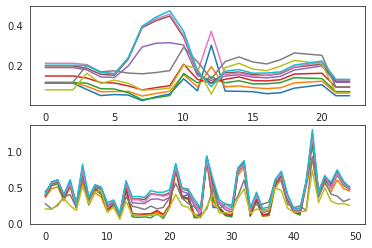

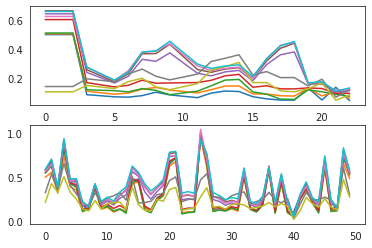

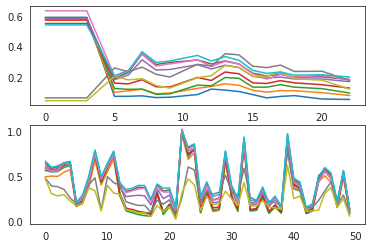

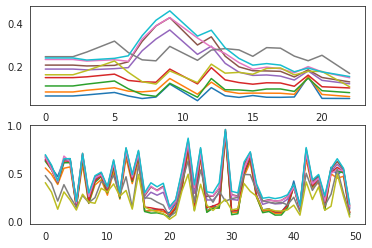

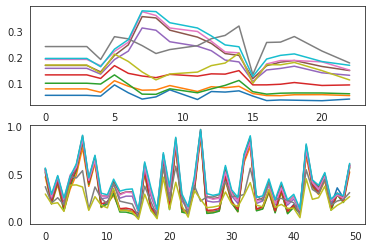

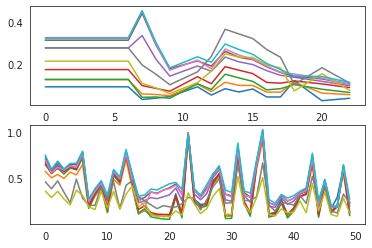

In [12]:
for idx in np.arange(20):

    # select the same bands (in the same sequence)
    tx_idx = np.stack([tx[idx,:,tumbands.index(band)] for band in plotbands],-1)
    # select the same bands (in the same sequence)
    x_idx = np.stack([x[idx,:,gafbands.index(band)] for band in plotbands],-1)

    xdf = pd.DataFrame(x_idx, columns=plotbands)
    xdf.index.name="t"
    f = "/home/marc/projects/Phiweek19_Presentation/images/example/{}-{}.csv".format(y[idx,0], meta[idx])
    print("writing "+f)
    xdf.to_csv(f)

    txdf = pd.DataFrame(tx_idx, columns=plotbands)
    #txdf.index.name="t"
    f = "/home/marc/projects/Phiweek19_Presentation/images/example/{}-{}_raw.csv".format(ty[idx,0], meta[idx])
    print("writing "+f)
    #txdf.to_csv(f)
    #tx["label"] = y[idx,0]
    #tx["labelname"] = tum_dataset.classname[y[idx,0]]

    fig,axs = plt.subplots(2)
    axs[0].plot(x_idx)
    axs[1].plot(tx_idx)


{'B04': '#a6cee3', 'NDWI': '#1f78b4', 'NDVI': '#b2df8a', 'RATIOVVVH': '#33a02c', 'B09': '#fb9a99', 'B8A': '#e31a1c', 'IRECI': '#fdbf6f', 'B07': '#ff7f00', 'B12': '#cab2d6', 'B02': '#6a3d9a', 'B03': '#0f1b5f', 'B01': '#b15928', 'B10': '#005293', 'VH': '#98c6ea', 'B08': '#e37222', 'VV': '#a2ad00', 'B05': '#69085a', 'B11': '#007c30', 'NDVVVH': '#00778a', 'BRIGHTNESS': '#000000', 'B06': '#0f1b5f'}


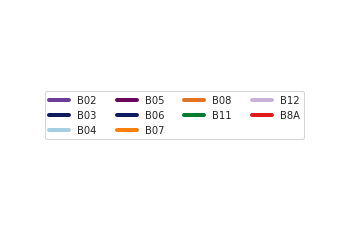

In [13]:
colors = [colordict[p] for p in plotbands]

legendfig, ax = plt.subplots(1, 1)
legend_elements = [Line2D([0], [0], color=color, lw=4, label=band) for band,color in dict(zip(plotbands, colors)).items()]
print(colordict)
ax.legend(handles=legend_elements, ncol=4, loc="center")
ax.axis("off")
legendfig.savefig("/tmp/legend.png",dpi=300)

In [14]:
gaf_dataset.classname[27]

'GPS Winterweichweizen'

<Figure size 432x288 with 0 Axes>

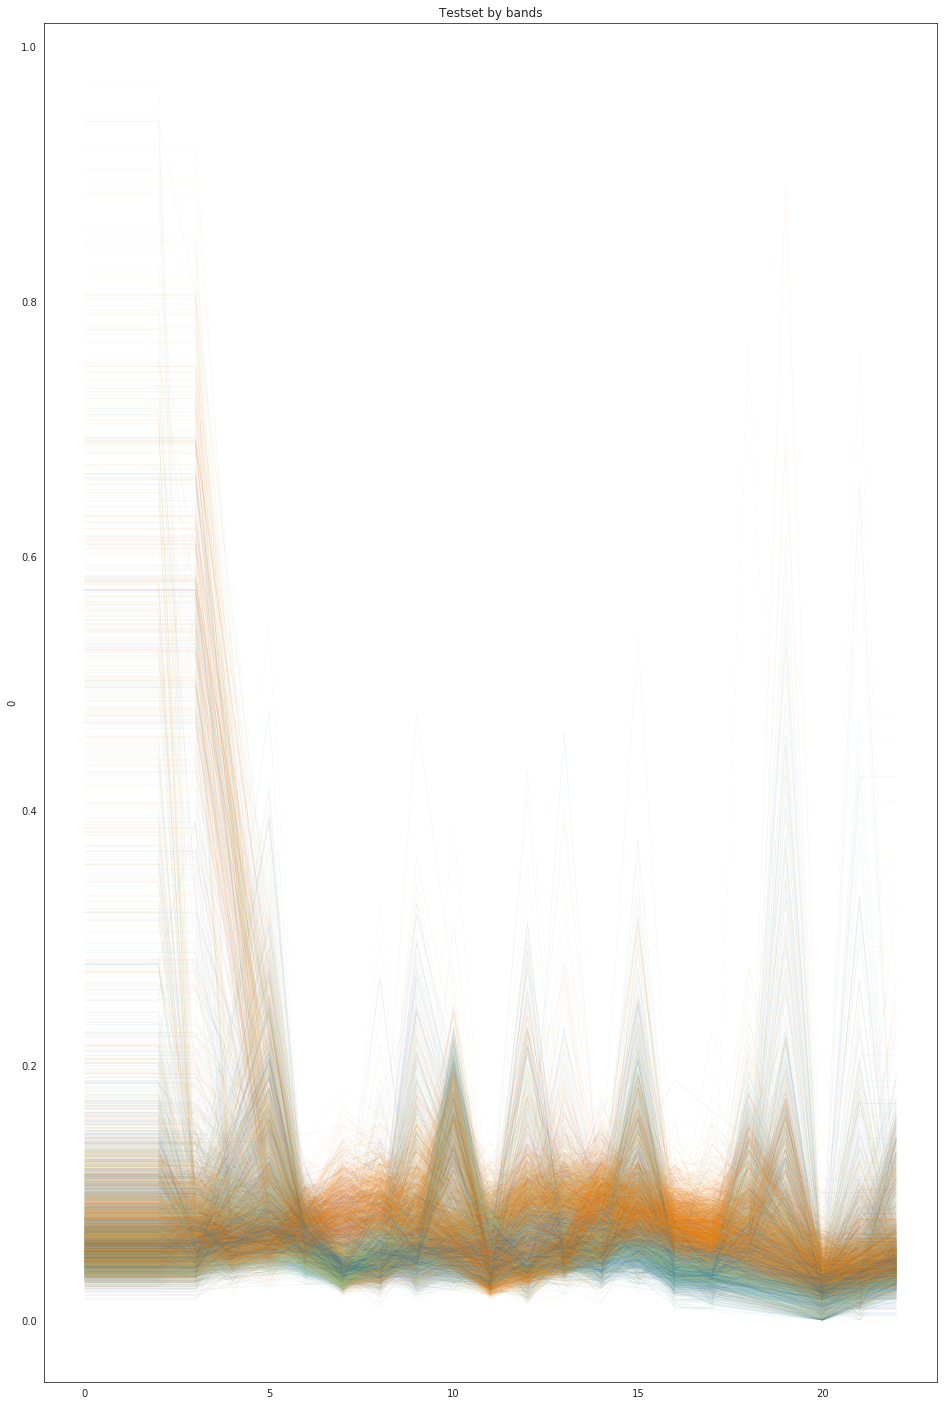

In [15]:
colors = 10 * ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00',
                   '#cab2d6',
                   '#6a3d9a', '#ffff99', '#b15928']

sns.despine(offset=6, left=True)

plotfig, axs = plt.subplots(1, figsize=(16, 25))
#for i in tqdm(range(x.shape[2])):
i=0
Xtrain, ytrain = x, y

axs.set_title("Trainset by bands")
axs.set_title("Testset by bands")

axs.set_ylabel(i)
axs.set_ylabel(i)
for y_ in np.unique(y):
    traindata = Xtrain[ytrain[:,0] == y_]
    if len(traindata) > 0:
        axs.plot(traindata[:,:,i].T, linewidth=0.5, c=colors[y_], alpha=0.1,
                       zorder=np.random.randint(100))




# draw legend in a separate plot
#legendfig, ax = plt.subplots(1, 1, figsize=(16, 4))
#legend_elements = [Line2D([0], [0], color=colors[i], lw=4, label=classes[i]) for i in range(len(classes))]
#ax.legend(handles=legend_elements, ncol=14, loc="center")
#ax.axis("off")

In [42]:

def get_ds(region, scheme="blocks", mode=None, classmapping=""):
    #classmapping = "/data/BavarianCrops/classmapping.csv.gaf.v3"

    train = BavarianCropsDataset(root="/data/BavarianCrops", 
                         region=region, 
                         partition="train",
                         scheme=scheme,
                         mode=None,
                         classmapping = classmapping, 
                         samplet=70)
    
    valid = BavarianCropsDataset(root="/data/BavarianCrops", 
                         region=region, 
                         partition="valid",
                         scheme=scheme,
                         mode=None,
                         classmapping = classmapping, 
                         samplet=70)

    test = BavarianCropsDataset(root="/data/BavarianCrops", 
                         region=region, 
                         partition="test",
                         scheme=scheme,
                         mode=None,
                         classmapping = classmapping, 
                         samplet=70)
    
    return train,valid,test, train.classname


In [43]:
#trainlabels = train.y
import matplotlib.pyplot as plt

def get_labels(region, classmapping):
    train,valid,test,classname = get_ds(region,classmapping=classmapping)
    return np.hstack([train.y,valid.y,test.y]),classname

In [53]:
classmapping="/data/BavarianCrops/classmapping.isprs.csv"
#holltrainds,hollvalidds, holltestds = get_ds("holl", classmapping="/data/BavarianCrops/classmapping.isprs.csv")

yholl,classname = get_labels("holl",classmapping=classmapping)
ynowa,classname = get_labels("nowa",classmapping=classmapping)
ykrum,classname = get_labels("krum",classmapping=classmapping)

labels = np.hstack([yholl,ynowa,ykrum])
nclasses = len(np.unique(labels))

holl,a = np.histogram(yholl, bins=nclasses, range=(0,nclasses))
nowa,b = np.histogram(ynowa, bins=nclasses, range=(0,nclasses))
krum,c = np.histogram(ykrum, bins=nclasses, range=(0,nclasses))

count,d = np.histogram(labels, bins=nclasses, range=(0,nclasses))
idxs = np.argsort(count)
idxs = np.flip(idxs,axis=0)

Initializing BavarianCropsDataset train partition in holl
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/blocks/holl/train
loaded 21308 samples
Dataset /data/BavarianCrops. region holl. partition train. X:21308x(71, 13), y:(21308,) with 23 classes
Initializing BavarianCropsDataset valid partition in holl
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/blocks/holl/valid
loaded 4000 samples
Dataset /data/BavarianCrops. region holl. partition valid. X:4000x(146, 13), y:(4000,) with 23 classes
Initializing BavarianCropsDataset test partition in holl
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/blocks/holl/test
loaded 9792 samples
Dataset /data/BavarianCrops. region holl. partition test. X:9792x(144, 13), y:(9792,) with 23 classes
Initializing BavarianCropsDataset train partition in nowa
read 23 classes
precached dataset files found at /data/Bav

writing /home/marc/projects/ISPRS_CropTypeMapping/images/aoimap/classhist.pdf


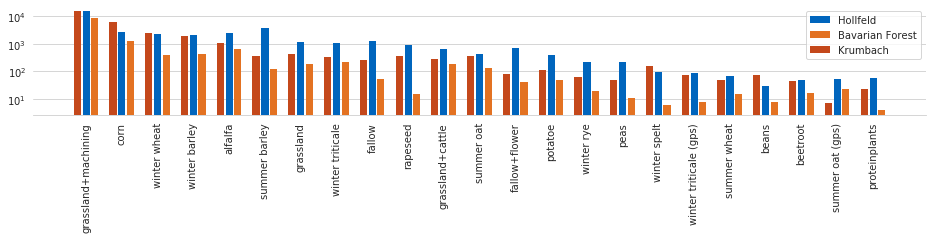

In [54]:
sns.set_style("whitegrid")

tumorange=np.array([227,114,34,255])/255
tumblue=np.array([0,101,189,255])/255
tumbluelight=np.array([152,198,234,255])/255
tumred=np.array([196,72,27,255])/255


fig,ax = plt.subplots(figsize=(16,2))
ax.bar(x=np.arange(len(holl)),height=holl[idxs],  width=.2, linewidth=0, color=tumblue)
ax.bar(x=np.arange(len(nowa))+.24,height=nowa[idxs],  width=.2, linewidth=0, color=tumorange)
ax.bar(x=np.arange(len(krum))-.25,height=krum[idxs],  width=.2, linewidth=0, color=tumred)
ax.set_yscale("log")
#ax.set_ylim((0,100))
ax.set_xticks(np.arange(len(classname)))
ax.set_xticklabels(classname[idxs], rotation = 90)
ax.legend(["Hollfeld","Bavarian Forest","Krumbach"])
ax.grid(which='major', axis='x')
sns.despine(fig=fig,left=True)

fname="/home/marc/projects/ISPRS_CropTypeMapping/images/aoimap/classhist.pdf"
save_plot(fig,fname)
#fig.savefig(fname,dpi=300, transparent=True,bbox_inches='tight')

## 12 classes

In [50]:
classmapping="/data/BavarianCrops/classmapping.isprs2.csv"
#holltrainds,hollvalidds, holltestds = get_ds("holl", classmapping="/data/BavarianCrops/classmapping.isprs.csv")

yholl,classname = get_labels("holl",classmapping=classmapping)
ynowa,classname = get_labels("nowa",classmapping=classmapping)
ykrum,classname = get_labels("krum",classmapping=classmapping)

labels = np.hstack([yholl,ynowa,ykrum])
nclasses = len(np.unique(labels))

holl,a = np.histogram(yholl, bins=nclasses, range=(0,nclasses))
nowa,b = np.histogram(ynowa, bins=nclasses, range=(0,nclasses))
krum,c = np.histogram(ykrum, bins=nclasses, range=(0,nclasses))

count,d = np.histogram(labels, bins=nclasses, range=(0,nclasses))
idxs = np.argsort(count)
idxs = np.flip(idxs,axis=0)

  0%|          | 69/22407 [00:00<00:32, 689.06it/s]

Initializing BavarianCropsDataset train partition in holl
read 12 classes
no cached dataset found. iterating through csv folders in /data/BavarianCrops/csv/holl


  0%|          | 14/4211 [00:00<00:30, 138.97it/s]

loaded 20858 samples
Dataset /data/BavarianCrops. region holl. partition train. X:20858x(71, 13), y:(20858,) with 12 classes
Initializing BavarianCropsDataset valid partition in holl
read 12 classes
no cached dataset found. iterating through csv folders in /data/BavarianCrops/csv/holl


100%|██████████| 4211/4211 [00:20<00:00, 205.43it/s]


loaded 3909 samples
Dataset /data/BavarianCrops. region holl. partition valid. X:3909x(146, 13), y:(3909,) with 12 classes
Initializing BavarianCropsDataset test partition in holl
read 12 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs2.csv/blocks/holl/test


  0%|          | 7/7865 [00:00<01:53, 69.19it/s]

loaded 9583 samples
Dataset /data/BavarianCrops. region holl. partition test. X:9583x(144, 13), y:(9583,) with 12 classes
Initializing BavarianCropsDataset train partition in nowa
read 12 classes
no cached dataset found. iterating through csv folders in /data/BavarianCrops/csv/nowa


100%|██████████| 7865/7865 [00:53<00:00, 148.10it/s]
../src/datasets/BavarianCrops_Dataset.py:205: RuntimeWarning: divide by zero encountered in true_divide
  self.classweights = 1 / self.hist
  1%|▏         | 11/770 [00:00<00:06, 108.73it/s]

loaded 7679 samples
Dataset /data/BavarianCrops. region nowa. partition train. X:7679x(289, 13), y:(7679,) with 12 classes
Initializing BavarianCropsDataset valid partition in nowa
read 12 classes
no cached dataset found. iterating through csv folders in /data/BavarianCrops/csv/nowa


100%|██████████| 770/770 [00:04<00:00, 154.58it/s]


loaded 746 samples
Dataset /data/BavarianCrops. region nowa. partition valid. X:746x(289, 13), y:(746,) with 12 classes
Initializing BavarianCropsDataset test partition in nowa
read 12 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs2.csv/blocks/nowa/test


  0%|          | 3/20336 [00:00<11:43, 28.89it/s]

loaded 3547 samples
Dataset /data/BavarianCrops. region nowa. partition test. X:3547x(287, 13), y:(3547,) with 12 classes
Initializing BavarianCropsDataset train partition in krum
read 12 classes
no cached dataset found. iterating through csv folders in /data/BavarianCrops/csv/krum


  0%|          | 3/5728 [00:00<03:14, 29.43it/s]

loaded 19601 samples
Dataset /data/BavarianCrops. region krum. partition train. X:19601x(71, 13), y:(19601,) with 12 classes
Initializing BavarianCropsDataset valid partition in krum
read 12 classes
no cached dataset found. iterating through csv folders in /data/BavarianCrops/csv/krum


100%|██████████| 5728/5728 [00:23<00:00, 247.57it/s]


loaded 5482 samples
Dataset /data/BavarianCrops. region krum. partition valid. X:5482x(71, 13), y:(5482,) with 12 classes
Initializing BavarianCropsDataset test partition in krum
read 12 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs2.csv/blocks/krum/test
loaded 4278 samples
Dataset /data/BavarianCrops. region krum. partition test. X:4278x(143, 13), y:(4278,) with 12 classes


writing /home/marc/projects/ISPRS_CropTypeMapping/images/aoimap/classhist_12.pdf


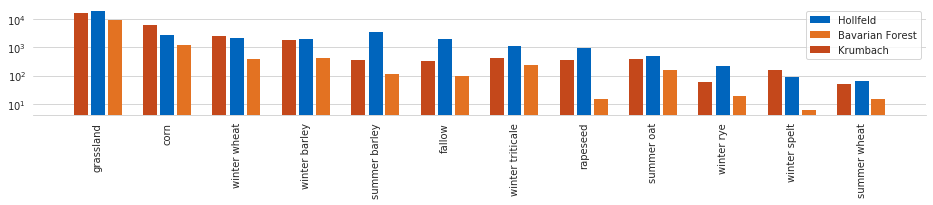

In [52]:
sns.set_style("whitegrid")

tumorange=np.array([227,114,34,255])/255
tumblue=np.array([0,101,189,255])/255
tumbluelight=np.array([152,198,234,255])/255
tumred=np.array([196,72,27,255])/255

fig,ax = plt.subplots(figsize=(16,2))
ax.bar(x=np.arange(len(holl)),height=holl[idxs],  width=.2, linewidth=0, color=tumblue)
ax.bar(x=np.arange(len(nowa))+.24,height=nowa[idxs],  width=.2, linewidth=0, color=tumorange)
ax.bar(x=np.arange(len(krum))-.25,height=krum[idxs],  width=.2, linewidth=0, color=tumred)
ax.set_yscale("log")
#ax.set_ylim((0,100))
ax.set_xticks(np.arange(len(classname)))
ax.set_xticklabels(classname[idxs], rotation = 90)
ax.legend(["Hollfeld","Bavarian Forest","Krumbach"])
ax.grid(which='major', axis='x')
sns.despine(fig=fig,left=True)

fname="/home/marc/projects/ISPRS_CropTypeMapping/images/aoimap/classhist_12.pdf"
save_plot(fig,fname)
#fig.savefig(fname,dpi=300, transparent=True,bbox_inches='tight')

Initializing BavarianCropsDataset train partition in holl
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/blocks/holl/train
loaded 21308 samples
Dataset /data/BavarianCrops. region holl. partition train. X:21308x(71, 13), y:(21308,) with 23 classes
Initializing BavarianCropsDataset valid partition in holl
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/blocks/holl/valid
loaded 4000 samples
Dataset /data/BavarianCrops. region holl. partition valid. X:4000x(146, 13), y:(4000,) with 23 classes
Initializing BavarianCropsDataset test partition in holl
read 23 classes
precached dataset files found at /data/BavarianCrops/npy/classmapping.isprs.csv/blocks/holl/test
loaded 9792 samples
Dataset /data/BavarianCrops. region holl. partition test. X:9792x(144, 13), y:(9792,) with 23 classes
Initializing BavarianCropsDataset train partition in nowa
read 23 classes
precached dataset files found at /data/Bav

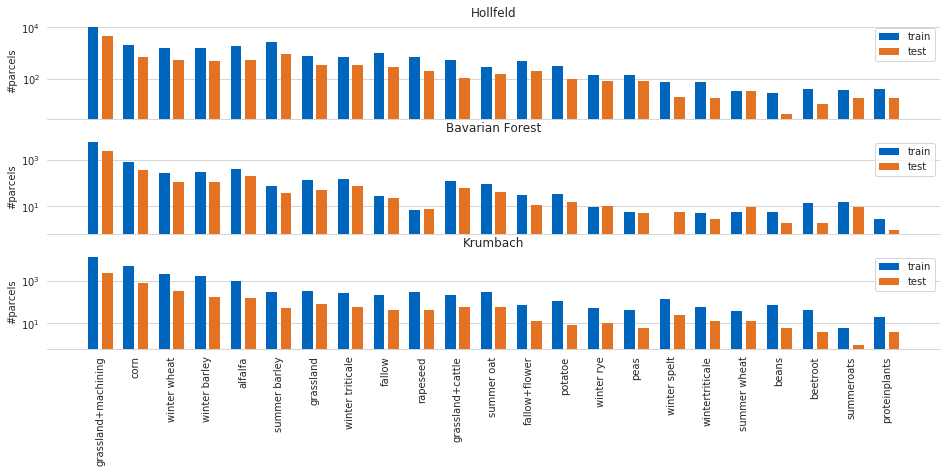

In [64]:
def get_partition_historgram(region):
    train, valid, test = get_ds(region)
    trainhist, _ = np.histogram(train.y, bins=nclasses, range=(0,nclasses))
    validhist, _ = np.histogram(valid.y, bins=nclasses, range=(0,nclasses))
    testhist, _ = np.histogram(test.y, bins=nclasses, range=(0,nclasses))
    return trainhist + validhist, testhist

holl_tpl = get_partition_historgram("holl")
nowa_tpl = get_partition_historgram("nowa")
krum_tpl = get_partition_historgram("krum")

offset=.2
width=.3

fig,axs = plt.subplots(3,figsize=(16,6))

axs[0].bar(x=np.arange(len(holl_tpl[0]))-offset,height=holl_tpl[0][idxs],  width=width, linewidth=0, color=tumblue)
#axs[0].bar(x=np.arange(len(holl_tpl[0])),height=holl_tpl[1][idxs],  width=width, linewidth=0, color=tumbluelight)
axs[0].bar(x=np.arange(len(holl_tpl[0]))+offset,height=holl_tpl[1][idxs],  width=width, linewidth=0, color=tumorange)
axs[0].set_title("Hollfeld")

axs[1].bar(x=np.arange(len(nowa_tpl[0]))-offset,height=nowa_tpl[0][idxs],  width=width, linewidth=0, color=tumblue)
#axs[1].bar(x=np.arange(len(nowa_tpl[0]))       ,height=nowa_tpl[1][idxs],  width=width, linewidth=0, color=tumbluelight)
axs[1].bar(x=np.arange(len(nowa_tpl[0]))+offset,height=nowa_tpl[1][idxs],  width=width, linewidth=0, color=tumorange)
axs[1].set_title("Bavarian Forest")

axs[2].bar(x=np.arange(len(krum_tpl[0]))-offset,height=krum_tpl[0][idxs],  width=width, linewidth=0, color=tumblue)
#axs[2].bar(x=np.arange(len(krum_tpl[0]))       ,height=krum_tpl[1][idxs],  width=width, linewidth=0, color=tumbluelight)
axs[2].bar(x=np.arange(len(krum_tpl[0]))+offset,height=krum_tpl[1][idxs],  width=width, linewidth=0, color=tumorange)
axs[2].set_title("Krumbach")

#axs[1].bar(x=np.arange(len(nowa_tpl[0])),height=nowa[idxs],  width=.5, linewidth=0, color=tumorange)

#axs[2].bar(x=np.arange(len(krum_tpl[0])),height=krum[idxs],  width=.5, linewidth=0, color=tumred)

for ax in axs:
    #ax.set_ylim((0,100))
    ax.set_ylabel("#parcels")
    #ax.legend(["Hollfeld","Bav. Forest","Krumbach"])
    ax.grid(which='major', axis='x')
    ax.set_yscale("log")
    ax.legend(["train","test"])
    ax.set_xticks(np.arange(len(holltrainds.classname)))
    ax.set_xticklabels([""]*len(idxs), rotation = 90)

ax.set_xticks(np.arange(len(holltrainds.classname)))
ax.set_xticklabels(holltrainds.classname[idxs], rotation = 90)
    
sns.despine(fig=fig,left=True)
fname="/home/marc/projects/ISPRS_CropTypeMapping/images/aoimap/classhist_traintest.png"
print(f"writing {fname}")
fig.savefig(fname,dpi=300, transparent=True, bbox_inches='tight')